In [28]:
# EXP 2: DATA CLEANING

import pandas as pd
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset('titanic')

print(f"\nShape before cleaning: {df.shape}")
print(df.head(1))

# 1. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 2. Drop columns with too many missing values (optional)
df = df.drop(['deck'], axis=1)  # 'deck' has lots of nulls

# 3. Fill missing values (example: age and embarked)
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 4. Check and remove duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicate_count}")
df = df.drop_duplicates()

# 5. Check data types
print("\nData types:")
print(df.dtypes)

# 6. Final cleaned data preview
print("\nCleaned Data Preview:")
print(df.head(1))
print(f"\nFinal shape: {df.shape}")



Shape before cleaning: (891, 15)
   survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Duplicate rows found: 116

Data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

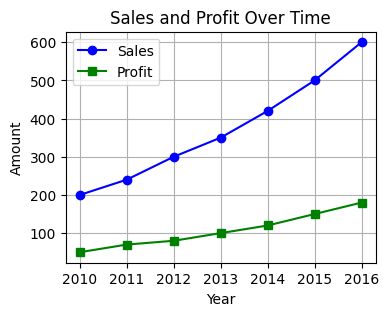

<Figure size 400x300 with 0 Axes>

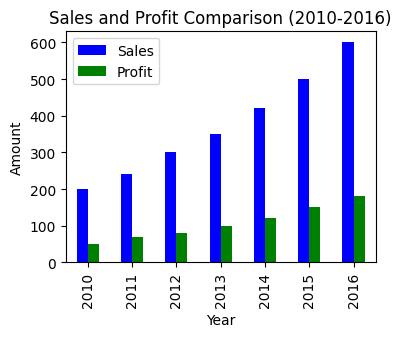

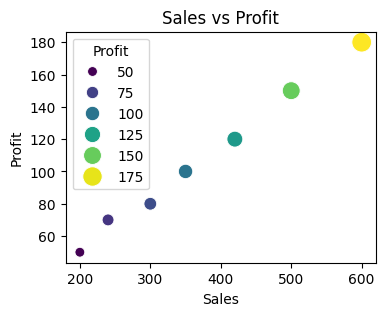

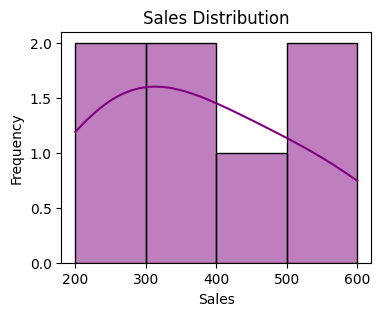

In [7]:
# EXP 3: DATA VISUALIZATION 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016],
        'Sales': [200, 240, 300, 350, 420, 500, 600],
        'Profit': [50, 70, 80, 100, 120, 150, 180]}
df = pd.DataFrame(data)

plt.figure(figsize=(4,3))
plt.plot(df['Year'], df['Sales'], marker='o', color='b', label='Sales')
plt.plot(df['Year'], df['Profit'], marker='s', color='g', label='Profit')
plt.title('Sales and Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4,3))
df.plot(kind='bar', x='Year', y=['Sales', 'Profit'], color=['blue', 'green'], figsize=(4,3))
plt.title('Sales and Profit Comparison (2010-2016)')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.show()

plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Profit', palette='viridis', size='Profit', sizes=(50, 200))
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

plt.figure(figsize=(4,3))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


Logistic Regression Evaluation Metrics:
Accuracy: 1.00
Precision (Weighted): 1.00
Recall (Weighted): 1.00
F1 Score (Weighted): 1.00

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



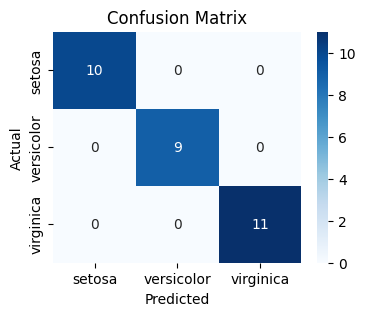

In [10]:
# EXP 4: LOGISTIC REGRESSION AND EXPLORE PERFORMANCE EVALUATION METRICS

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
  )


# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Output results
print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")
print("\nClassification Report:\n", report)

# Confusion Matrix Visualization
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\mital\AppData\Local\Temp\ipykernel_30668\1205837761.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_imbalanced, palette='pastel')


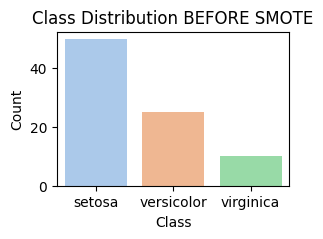

C:\Users\mital\AppData\Local\Temp\ipykernel_30668\1205837761.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


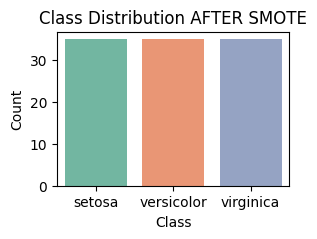

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



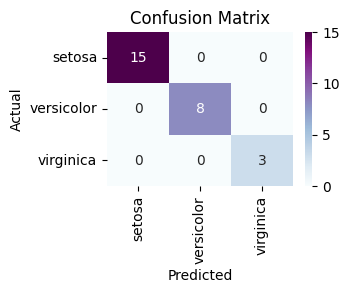

In [16]:
# EXP 5 To generate synthetic data for class imbalance using the SMOTE 


import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Simulate class imbalance
df_imbalanced = pd.concat([
    df[df['target'] == 0],
    df[df['target'] == 1].sample(25, random_state=42),
    df[df['target'] == 2].sample(10, random_state=42)
])

X_imbalanced = df_imbalanced.drop('target', axis=1)
y_imbalanced = df_imbalanced['target']

# Visualize class distribution before SMOTE
plt.figure(figsize=(3, 2))
sns.countplot(x=y_imbalanced, palette='pastel')
plt.title("Class Distribution BEFORE SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Visualize class distribution after SMOTE
plt.figure(figsize=(3, 2))
sns.countplot(x=y_resampled, palette='Set2')
plt.title("Class Distribution AFTER SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Average distances for each point to its k-nearest neighbors:
[0.5        0.5        0.5        0.5        0.5        0.5
 0.70710678 0.5        0.5        0.5        9.21954446]
Outliers detected (indices of outliers): [10]


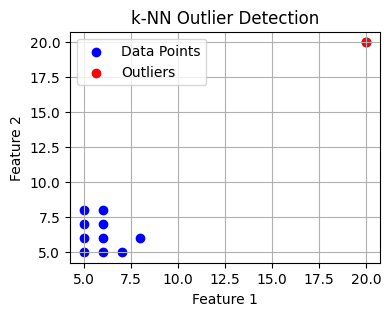

In [20]:
# XP 8 : OUTLIER DETECTION



import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Example data points (with a potential outlier at [20, 20])
X = np.array([[5, 5], [6, 5], [5, 6], [6, 6], [5, 7], [7, 5], [8, 6], [5, 8], [6, 7], [6, 8], [20, 20]])

# Define number of neighbors (k)
k = 2

# Fit the k-NN model
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)

# Calculate distances and indices of k-nearest neighbors
distances, indices = neigh.kneighbors(X)

# Calculate average distance for each point to its k-nearest neighbors
avg_distances = np.mean(distances, axis=1)

# Print the average distances for debugging
print("Average distances for each point to its k-nearest neighbors:")
print(avg_distances)

# Set a threshold for outlier detection (e.g., 90th percentile of the average distance)
threshold = np.percentile(avg_distances, 90)  # Set to 90th percentile for better sensitivity

# Identify outliers based on the threshold
outliers = np.where(avg_distances > threshold)

# Print outliers detected
print("Outliers detected (indices of outliers):", outliers[0])

# Visualize the data points and outliers
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], label='Data Points', c='blue')
plt.scatter(X[outliers[0], 0], X[outliers[0], 1], color='red', label='Outliers')
plt.legend()
plt.title('k-NN Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
